In [159]:
import pandas as pd
import matplotlib.pyplot as plt

In [160]:
filenames=['stores.csv','features.csv','train.csv']

In [161]:
dataframes = [pd.read_csv(f,parse_dates=True, ) for f in filenames]

In [162]:
dataframes[1].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


In [163]:
dataframes[2].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


In [164]:
dataframes[2] =dataframes[2].drop(['IsHoliday'], axis=1)
df =dataframes[1].merge(dataframes[2]  ,on=['Store', 'Date'])

In [165]:
df['Date']=pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Date          421570 non-null  datetime64[ns]
 2   Temperature   421570 non-null  float64       
 3   Fuel_Price    421570 non-null  float64       
 4   MarkDown1     150681 non-null  float64       
 5   MarkDown2     111248 non-null  float64       
 6   MarkDown3     137091 non-null  float64       
 7   MarkDown4     134967 non-null  float64       
 8   MarkDown5     151432 non-null  float64       
 9   CPI           421570 non-null  float64       
 10  Unemployment  421570 non-null  float64       
 11  IsHoliday     421570 non-null  bool          
 12  Dept          421570 non-null  int64         
 13  Weekly_Sales  421570 non-null  float64       
dtypes: bool(1), datetime64[ns](1), float64(10), int64(2)
memory usage: 4

In [166]:
df.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,1,24924.50
1,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,2,50605.27
2,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,3,13740.12
3,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,4,39954.04
4,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,5,32229.38


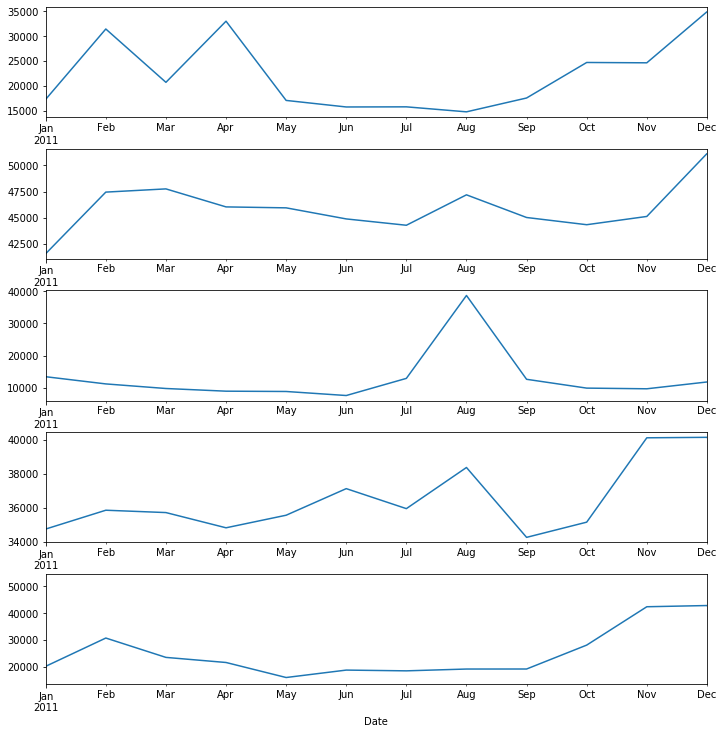

In [202]:

d=df.set_index('Date')
fig,axes=plt.subplots(nrows=5,ncols=1,figsize=(10, 10))
fig.tight_layout()
d['Weekly_Sales'][(d.Dept==1) & (d.Store==1)].resample('M').mean().plot(ax=axes[0],xlim=['2011-Jan','2011-Dec'])
d['Weekly_Sales'][(d.Dept==2) & (d.Store==1)].resample('M').mean().plot(ax=axes[1],xlim=['2011-Jan','2011-Dec'])
d['Weekly_Sales'][(d.Dept==3) & (d.Store==1)].resample('M').mean().plot(ax=axes[2],xlim=['2011-Jan','2011-Dec'])
d['Weekly_Sales'][(d.Dept==4) & (d.Store==1)].resample('M').mean().plot(ax=axes[3],xlim=['2011-Jan','2011-Dec'])
d['Weekly_Sales'][(d.Dept==5) & (d.Store==1)].resample('M').mean().plot(ax=axes[4],xlim=['2011-Jan','2011-Dec'])

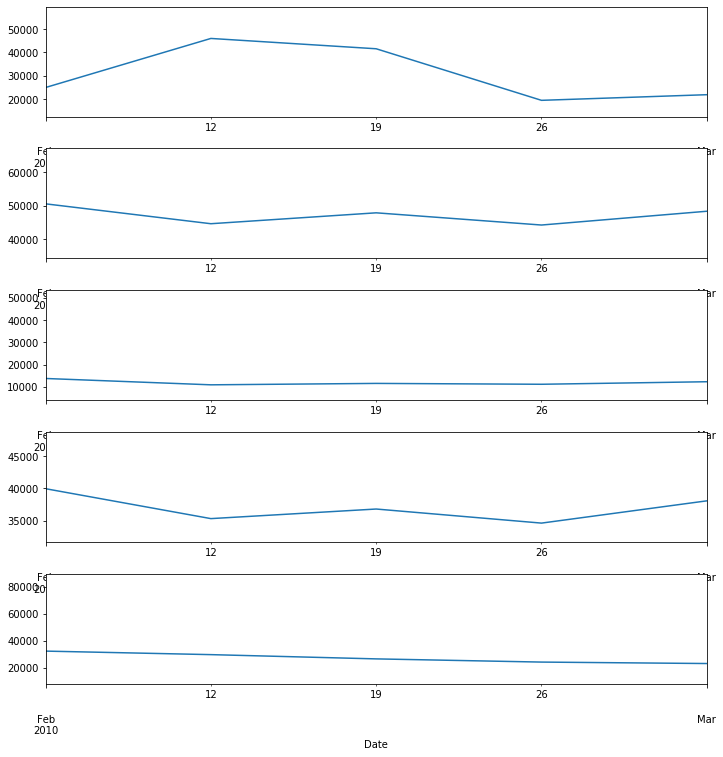

In [203]:
fig,axes=plt.subplots(nrows=5,ncols=1,figsize=(10, 10))
fig.tight_layout()
d['Weekly_Sales'][(d.Dept==1) & (d.Store==1)].plot(ax=axes[0],xlim=['2010-02-05 ','2010-03-05 '])
d['Weekly_Sales'][(d.Dept==2) & (d.Store==1)].plot(ax=axes[1],xlim=['2010-02-05 ','2010-03-05 '])
d['Weekly_Sales'][(d.Dept==3) & (d.Store==1)].plot(ax=axes[2],xlim=['2010-02-05 ','2010-03-05 '])
d['Weekly_Sales'][(d.Dept==4) & (d.Store==1)].plot(ax=axes[3],xlim=['2010-02-05 ','2010-03-05 '])
d['Weekly_Sales'][(d.Dept==5) & (d.Store==1)].plot(ax=axes[4],xlim=['2010-02-05 ','2010-03-05 '])


In [207]:
d['Weekly_Sales'][(d.Dept==5) & (d.Store==1)].head()

Date
2010-02-05    32229.38
2010-02-12    29620.81
2010-02-19    26468.27
2010-02-26    24101.89
2010-03-05    23082.14
Name: Weekly_Sales, dtype: float64